# 1: Setup & data preparation

Fake Dataset Sample:


,Age,Income,Education,DebtRatio,CreditScore,Defaulted,LoanAmount
0,39,70990,2,0.318090,612,0,42065
1,33,63869,3,0.211421,693,1,41663
2,41,50894,2,0.164266,668,1,33556
3,50,40295,3,0.386432,692,1,28354
4,32,60473,3,0.214827,672,1,38305



Dataset Statistics:


,Age,Income,Education,DebtRatio,CreditScore,Defaulted,LoanAmount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,34.820000,51197.528000,2.474000,0.393415,648.264000,0.96600,33174.996000
std,9.491875,14629.697602,1.137813,0.229372,99.934044,0.18132,7505.045967
min,18.000000,20000.000000,1.000000,0.000523,357.000000,0.00000,13183.000000
25%,28.000000,40906.000000,1.000000,0.193222,578.000000,1.00000,28060.750000
50%,35.000000,50946.000000,2.000000,0.387853,650.000000,1.00000,33048.000000
75%,41.000000,60932.750000,4.000000,0.591007,716.000000,1.00000,38594.750000
max,73.000000,97896.000000,4.000000,0.799646,850.000000,1.00000,50000.000000


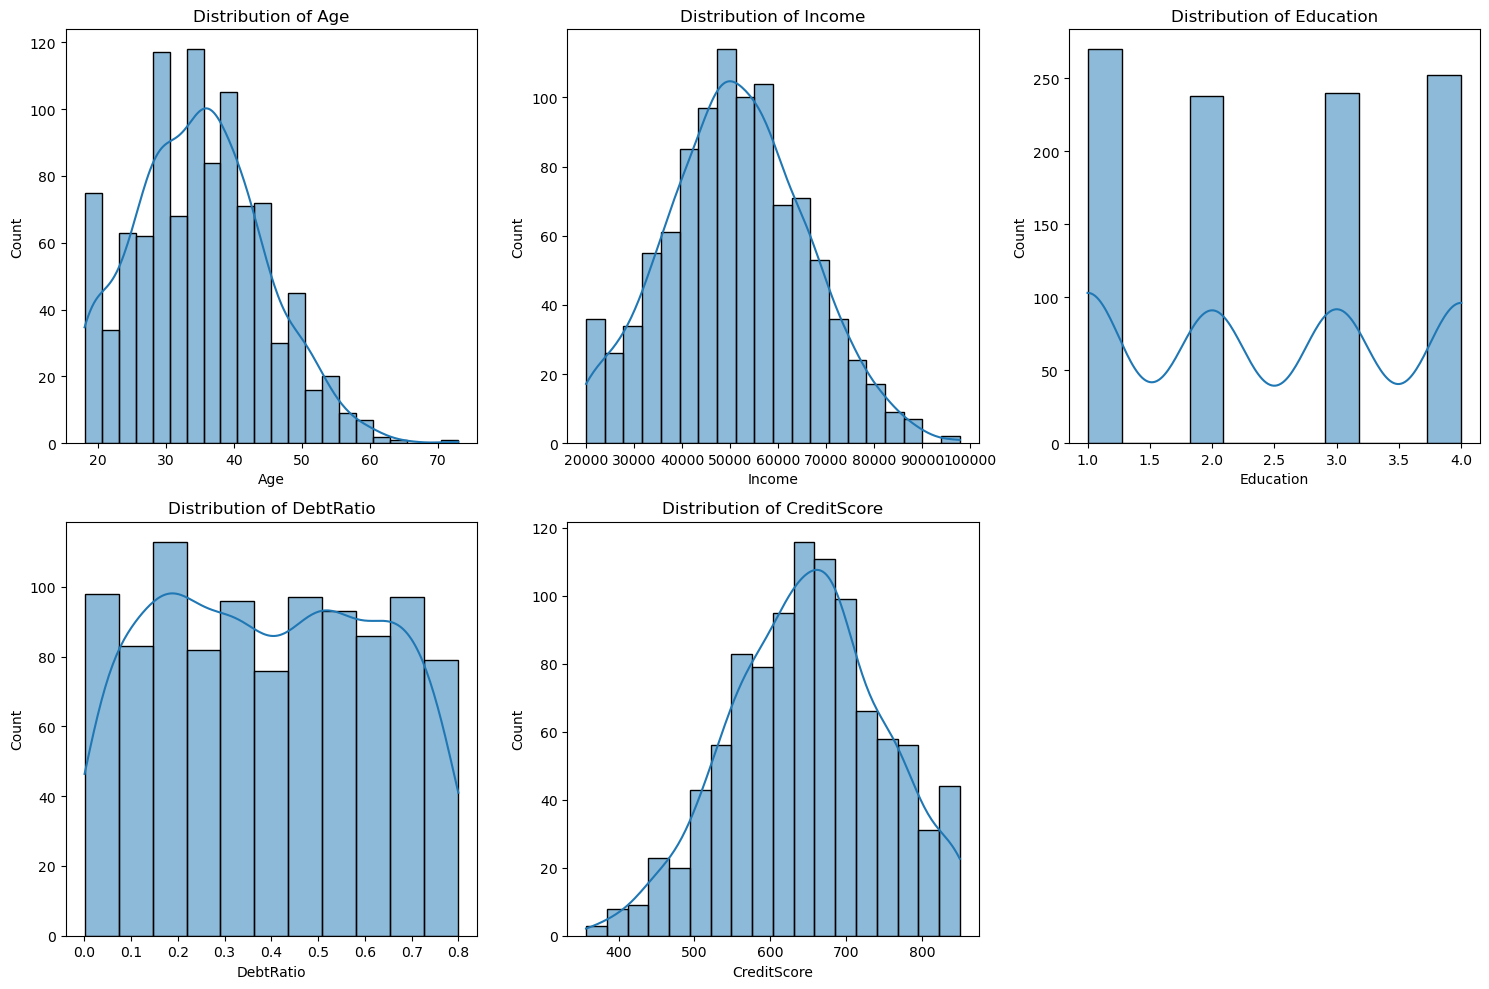

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, mean_squared_error, r2_score)
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate consistent fake data for all algorithms
def generate_fake_data(n_samples=1000):
    # Features
    age = np.random.normal(35, 10, n_samples).astype(int)
    income = np.random.normal(50000, 15000, n_samples).astype(int)
    education = np.random.randint(1, 5, n_samples)  # 1-4 representing education levels
    debt_ratio = np.random.uniform(0, 0.8, n_samples)
    credit_score = np.random.normal(650, 100, n_samples).astype(int)

    # Ensure some values are within reasonable bounds
    age = np.clip(age, 18, 80)
    income = np.clip(income, 20000, 120000)
    credit_score = np.clip(credit_score, 300, 850)

    # Create target variables
    # Binary classification target (defaulted on loan)
    defaulted = 0.1*age - 0.3*income/10000 + 0.5*debt_ratio*10 + np.random.normal(0, 1, n_samples) > 0.5
    defaulted = defaulted.astype(int)

    # Regression target (loan amount)
    loan_amount = 5000 + 100*age + 0.5*income - 2000*debt_ratio + np.random.normal(0, 2000, n_samples)
    loan_amount = np.clip(loan_amount, 1000, 50000).astype(int)

    return pd.DataFrame(
        {
            'Age': age,
            'Income': income,
            'Education': education,
            'DebtRatio': debt_ratio,
            'CreditScore': credit_score,
            'Defaulted': defaulted,
            'LoanAmount': loan_amount,
        }
    )

# Generate the data
fake_data = generate_fake_data(1000)

# Display first few rows
print("Fake Dataset Sample:")
display(fake_data.head())

# Basic statistics
print("\nDataset Statistics:")
display(fake_data.describe())

# Visualize distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(fake_data.columns[:-2]):  # Exclude target columns
    plt.subplot(2, 3, i+1)
    sns.histplot(fake_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Prepare data for modeling
X = fake_data.drop(['Defaulted', 'LoanAmount'], axis=1)
y_class = fake_data['Defaulted']  # For classification
y_reg = fake_data['LoanAmount']   # For regression

# Split data into train and test sets
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42)
_, _, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Scale features for algorithms that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Decision Tree

DECISION TREE CLASSIFIER

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.98      0.98      0.98       195

    accuracy                           0.96       200
   macro avg       0.61      0.59      0.60       200
weighted avg       0.96      0.96      0.96       200


Confusion Matrix:
[[  1   4]
 [  3 192]]


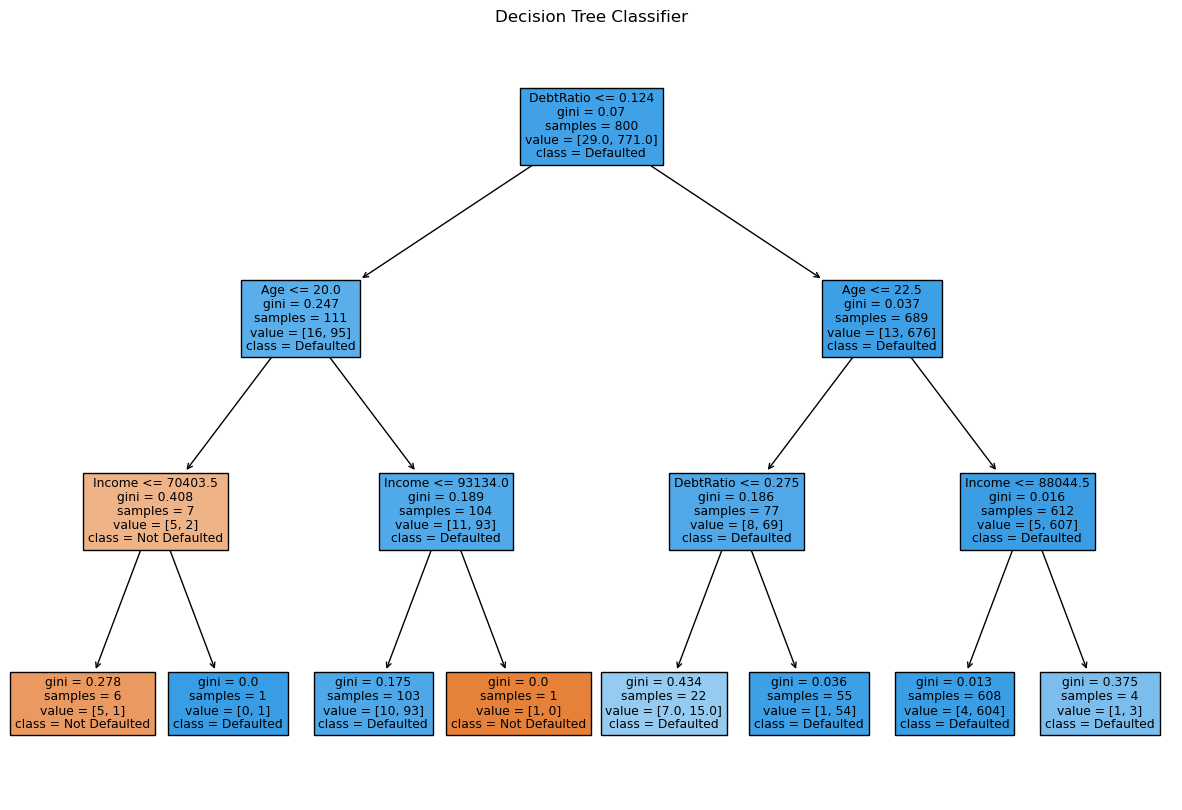


DECISION TREE REGRESSOR

Regression Metrics:
MSE: 6432034.75
R²: 0.89


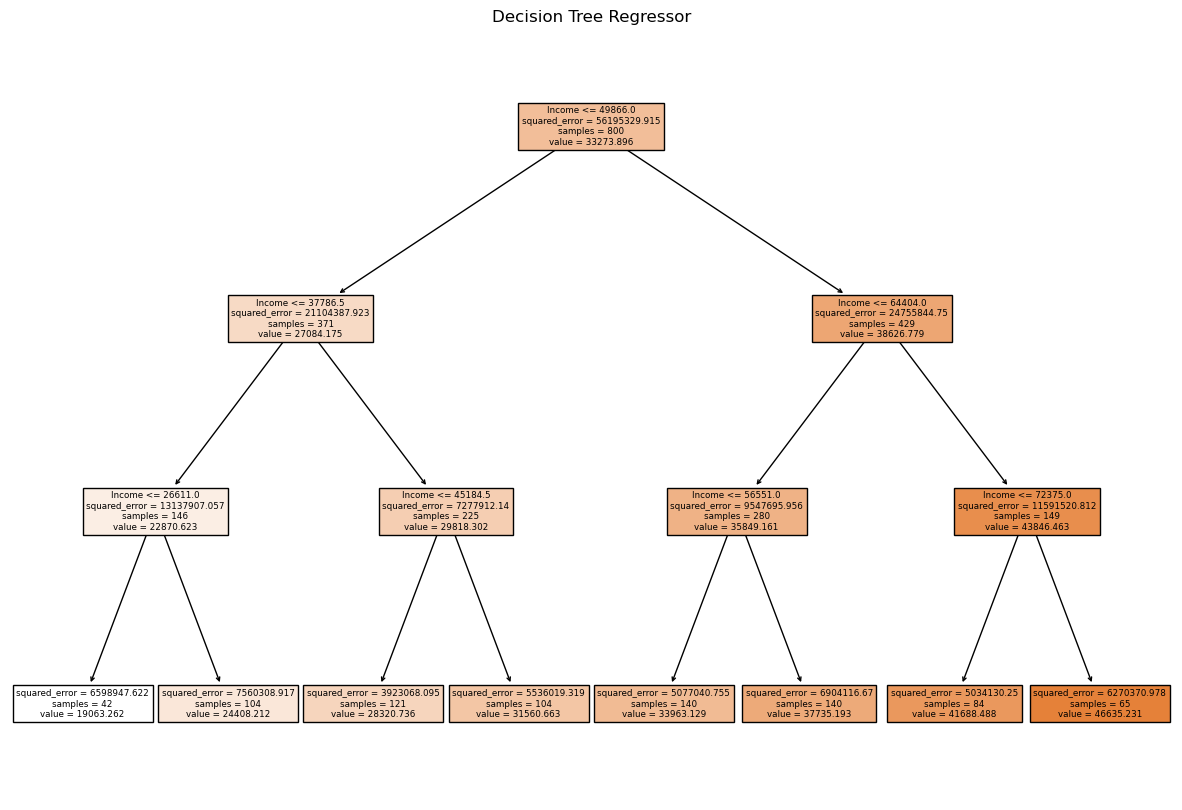

Feature Importances: [0.40158976 0.21531327 0.         0.38309697 0.        ]


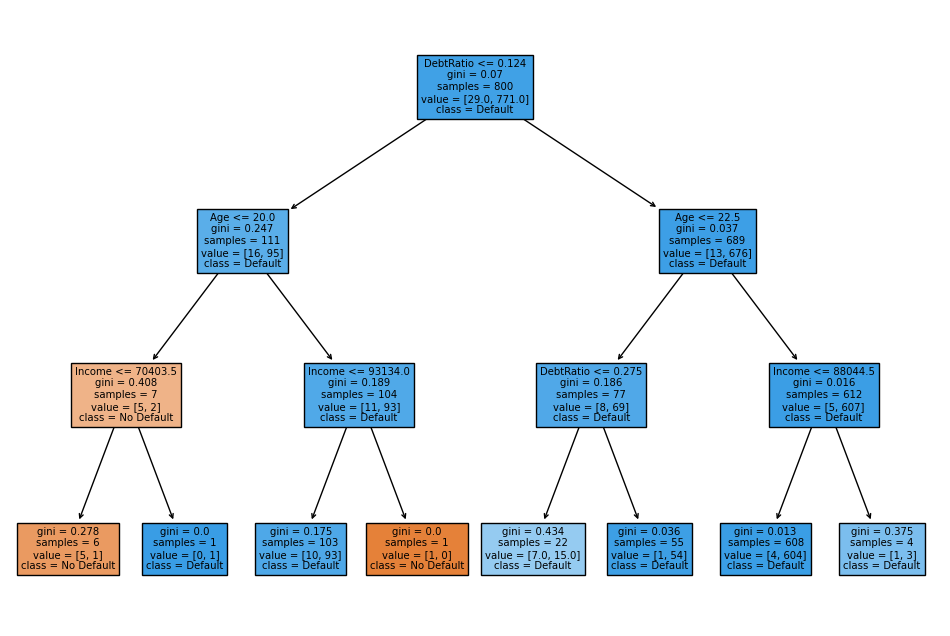

In [21]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# Decision Tree Classifier
print("="*50)
print("DECISION TREE CLASSIFIER")
print("="*50)

dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_class_train)

# Predictions
y_pred_class = dt_classifier.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_class))

print("\nConfusion Matrix:")
print(confusion_matrix(y_class_test, y_pred_class))

# Visualize the tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Defaulted', 'Defaulted'], filled=True)
plt.title("Decision Tree Classifier")
plt.show()

# Decision Tree Regressor
print("\n" + "="*50)
print("DECISION TREE REGRESSOR")
print("="*50)

dt_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_regressor.fit(X_train, y_reg_train)

# Predictions
y_pred_reg = dt_regressor.predict(X_test)

# Evaluation
print("\nRegression Metrics:")
print(f"MSE: {mean_squared_error(y_reg_test, y_pred_reg):.2f}")
print(f"R²: {r2_score(y_reg_test, y_pred_reg):.2f}")

# Visualize the tree
plt.figure(figsize=(15, 10))
plot_tree(dt_regressor, feature_names=X.columns, filled=True)
plt.title("Decision Tree Regressor")
plt.show()

print("Feature Importances:", dt_classifier.feature_importances_)
plt.figure(figsize=(12,8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No Default', 'Default'], filled=True)
plt.show()

# 3. Random Forest

RANDOM FOREST CLASSIFIER

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.97      0.99      0.98       195

    accuracy                           0.97       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.95      0.97      0.96       200


Confusion Matrix:
[[  0   5]
 [  1 194]]


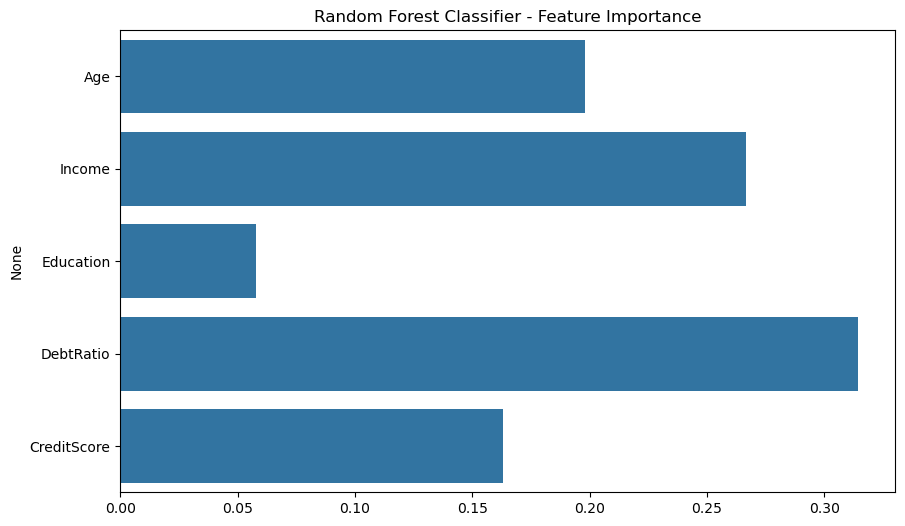


RANDOM FOREST REGRESSOR

Regression Metrics:
MSE: 5031069.95
R²: 0.91


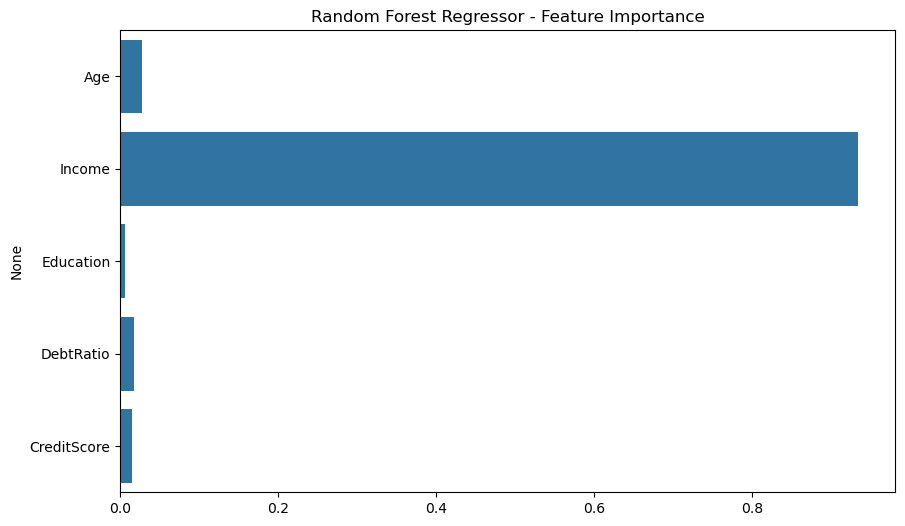

Feature Importances:
DebtRatio      0.314462
Income         0.266703
Age            0.197969
CreditScore    0.163032
Education      0.057832
dtype: float64


In [25]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Random Forest Classifier
print("="*50)
print("RANDOM FOREST CLASSIFIER")
print("="*50)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_class_train)

# Predictions
y_pred_class = rf_classifier.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_class))

print("\nConfusion Matrix:")
print(confusion_matrix(y_class_test, y_pred_class))

# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_classifier.feature_importances_, y=X.columns)
plt.title("Random Forest Classifier - Feature Importance")
plt.show()

# Random Forest Regressor
print("\n" + "="*50)
print("RANDOM FOREST REGRESSOR")
print("="*50)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_reg_train)

# Predictions
y_pred_reg = rf_regressor.predict(X_test)

# Evaluation
print("\nRegression Metrics:")
print(f"MSE: {mean_squared_error(y_reg_test, y_pred_reg):.2f}")
print(f"R²: {r2_score(y_reg_test, y_pred_reg):.2f}")

# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_regressor.feature_importances_, y=X.columns)
plt.title("Random Forest Regressor - Feature Importance")
plt.show()

print("Feature Importances:")
print(pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False))

# 4. Linear Regression

LINEAR REGRESSION

Regression Metrics:
MSE: 3785232.15
R²: 0.93

Model Coefficients:


,Feature,Coefficient
1,Income,7183.432129
0,Age,900.933834
4,CreditScore,155.297358
2,Education,6.982882
3,DebtRatio,-358.135058


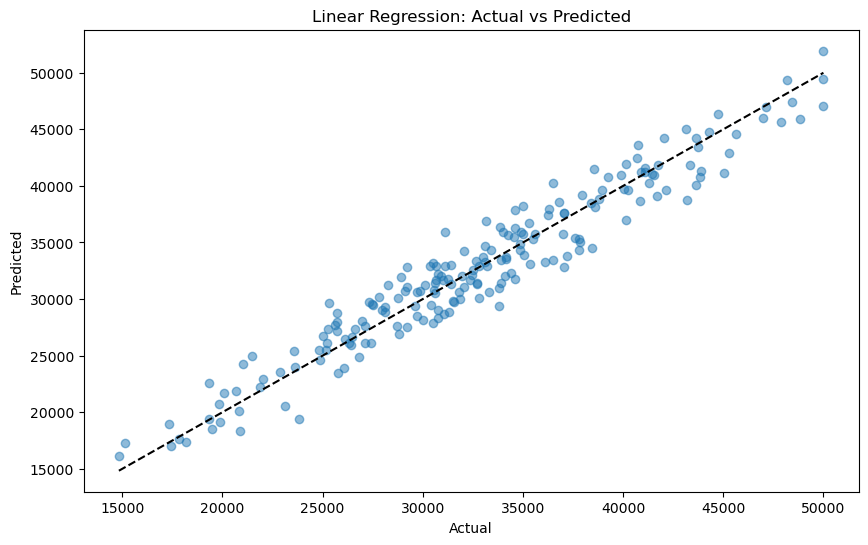

In [108]:
from sklearn.linear_model import LinearRegression

print("="*50)
print("LINEAR REGRESSION")
print("="*50)

# Note: Using scaled data for better performance
lr = LinearRegression()
lr.fit(X_train_scaled, y_reg_train)

# Predictions
y_pred_reg = lr.predict(X_test_scaled)

# Evaluation
print("\nRegression Metrics:")
print(f"MSE: {mean_squared_error(y_reg_test, y_pred_reg):.2f}")
print(f"R²: {r2_score(y_reg_test, y_pred_reg):.2f}")

# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', ascending=False)

print("\nModel Coefficients:")
display(coefficients)

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_pred_reg, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# 5. K-means Clustering

Note: you may need to restart the kernel to use updated packages.
K-MEANS CLUSTERING

Cluster Means:


,Age,Income,Education,DebtRatio,CreditScore,LoanAmount
Cluster,,,,,,
0,31.421233,50617.907534,2.794521,0.611561,663.729452,32277.380137
1,44.445378,47185.983193,2.226891,0.364283,593.008403,32158.441176
2,30.192593,55973.577778,2.359259,0.196142,678.629630,35334.862963



Silhouette Score: 0.14


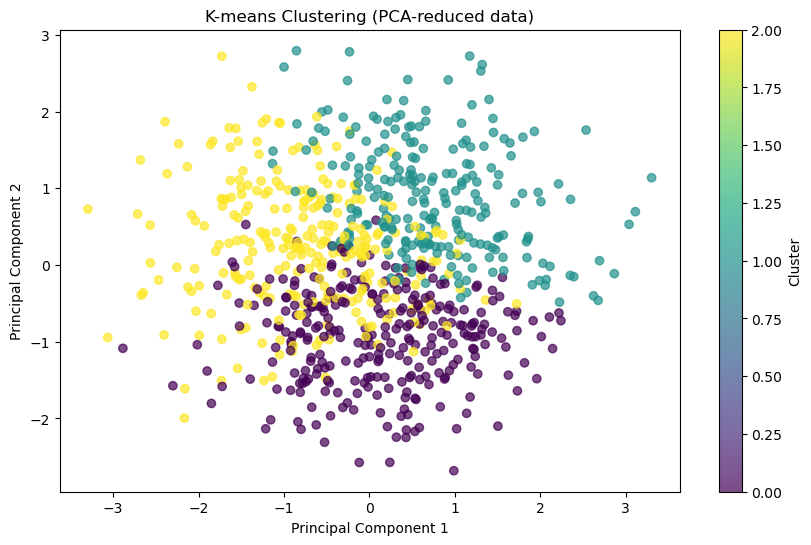

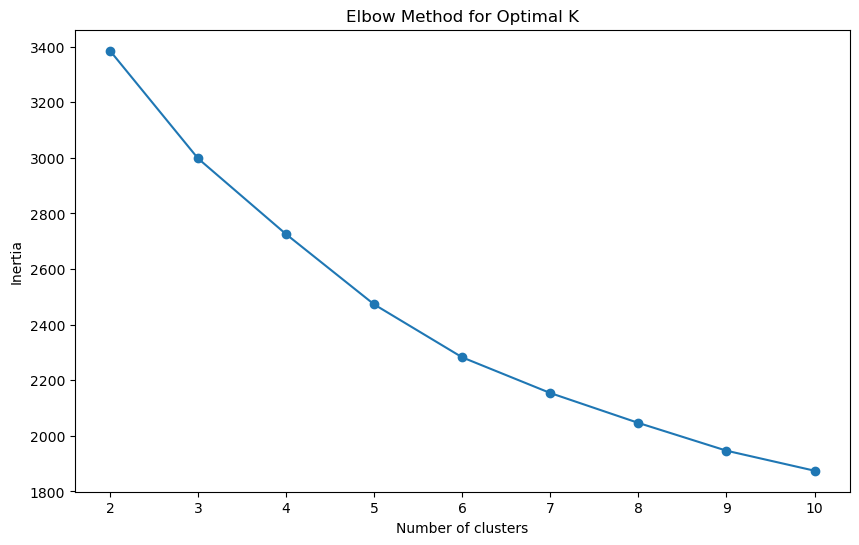

In [20]:
%pip install threadpoolctl
import os
# Set environment variables at the very beginning
os.environ['OMP_NUM_THREADS'] = '1'  # Set to 1 for maximum safety
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from threadpoolctl import threadpool_limits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("="*50)
print("K-MEANS CLUSTERING")
print("="*50)

# Triple protection against the memory leak
with threadpool_limits(limits=1, user_api='blas'):
    with threadpool_limits(limits=1, user_api='openmp'):
        # Force single-threaded operation
        kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
        clusters = kmeans.fit_predict(X_train_scaled)

# Add clusters to the original data for analysis
cluster_data = X_train.copy()
cluster_data['Cluster'] = clusters
cluster_data['LoanAmount'] = y_reg_train

# Analyze clusters
print("\nCluster Means:")
display(cluster_data.groupby('Cluster').mean())

# Silhouette Score
print(f"\nSilhouette Score: {silhouette_score(X_train_scaled, clusters):.2f}")

# Visualize clusters (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('K-means Clustering (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Elbow method to find optimal k
inertia = []
for k in range(2, 11):
    with threadpool_limits(limits=1, user_api='blas'):
        with threadpool_limits(limits=1, user_api='openmp'):
            kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
            kmeans.fit(X_train_scaled)
            inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# 6. Logistic Regression

LOGISTIC REGRESSION

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.98      1.00      0.99       195

    accuracy                           0.98       200
   macro avg       0.99      0.60      0.66       200
weighted avg       0.98      0.98      0.97       200


Confusion Matrix:
[[  1   4]
 [  0 195]]

Model Coefficients:


,Feature,Coefficient
3,DebtRatio,1.519059
0,Age,1.466690
2,Education,-0.043102
4,CreditScore,-0.173842
1,Income,-0.861615


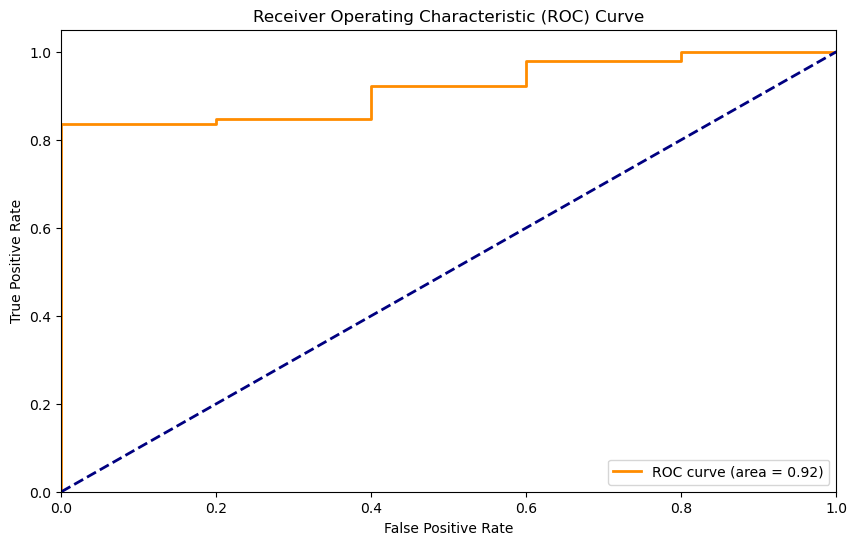

In [12]:
from sklearn.linear_model import LogisticRegression

print("="*50)
print("LOGISTIC REGRESSION")
print("="*50)

# Using scaled data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_class_train)

# Predictions
y_pred_class = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_class))

print("\nConfusion Matrix:")
print(confusion_matrix(y_class_test, y_pred_class))

# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("\nModel Coefficients:")
display(coefficients)

# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_class_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 7. Naive Bayes

NAIVE BAYES CLASSIFIER

Classification Report:
               precision    recall  f1-score   support

Not Defaulted       0.00      0.00      0.00         5
    Defaulted       0.97      1.00      0.99       195

     accuracy                           0.97       200
    macro avg       0.49      0.50      0.49       200
 weighted avg       0.95      0.97      0.96       200


Confusion Matrix:
[[  0   5]
 [  0 195]]


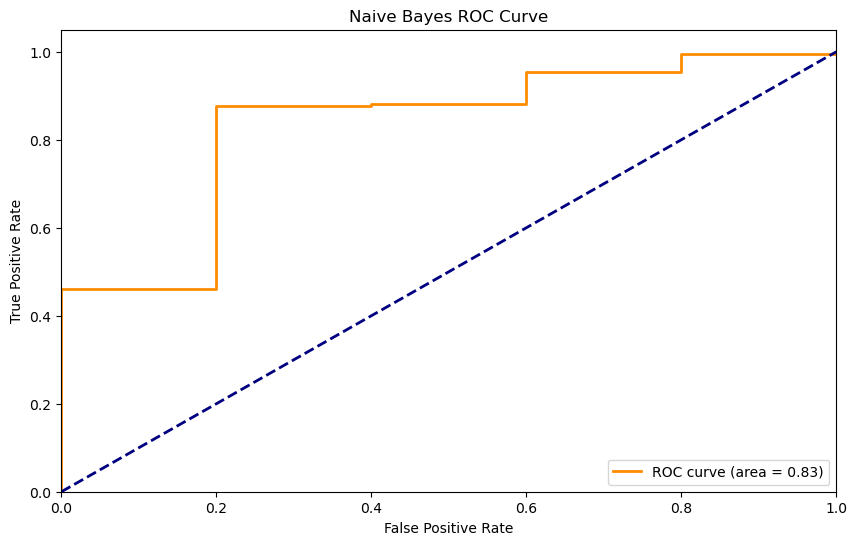


Class Distribution in Predictions:
1    200
Name: count, dtype: int64

Class Distribution in Test Data:
Defaulted
1    195
0      5
Name: count, dtype: int64


In [36]:
from sklearn.naive_bayes import GaussianNB

print("="*50)
print("NAIVE BAYES CLASSIFIER")
print("="*50)

nb = GaussianNB()
nb.fit(X_train, y_class_train)

# Predictions
y_pred_class = nb.predict(X_test)
y_pred_proba = nb.predict_proba(X_test)[:, 1]  # Probability of class 1

# Evaluation with zero_division handled
print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_class,
                            zero_division=0,
                            target_names=['Not Defaulted', 'Defaulted']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_class_test, y_pred_class))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_class_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
            label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Additional diagnostic information
print("\nClass Distribution in Predictions:")
print(pd.Series(y_pred_class).value_counts())

print("\nClass Distribution in Test Data:")
print(y_class_test.value_counts())

# 8. Support Vector Machines


SUPPORT VECTOR MACHINE (SVM)
Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

Not Defaulted       0.00      0.00      0.00         5
    Defaulted       0.97      1.00      0.99       195

     accuracy                           0.97       200
    macro avg       0.49      0.50      0.49       200
 weighted avg       0.95      0.97      0.96       200


Confusion Matrix:
[[  0   5]
 [  0 195]]

Class Distribution in Predictions:
1    200
Name: count, dtype: int64

Class Distribution in Test Data:
Defaulted
1    195
0      5
Name: count, dtype: int64


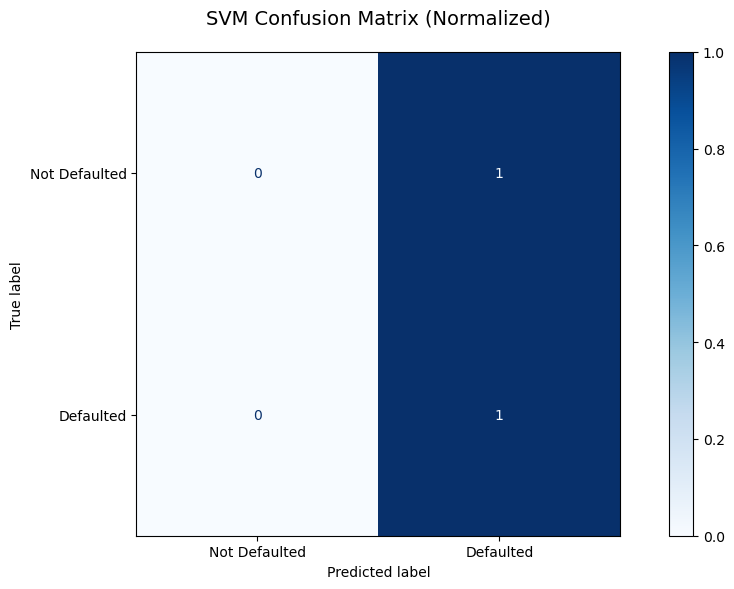

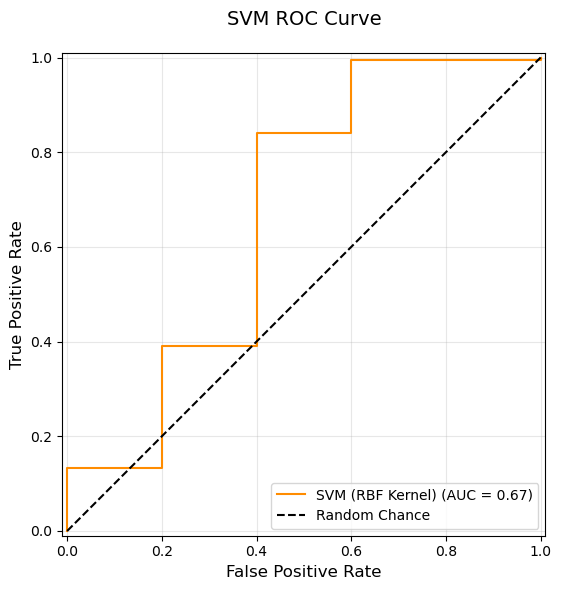

<Figure size 1000x600 with 0 Axes>

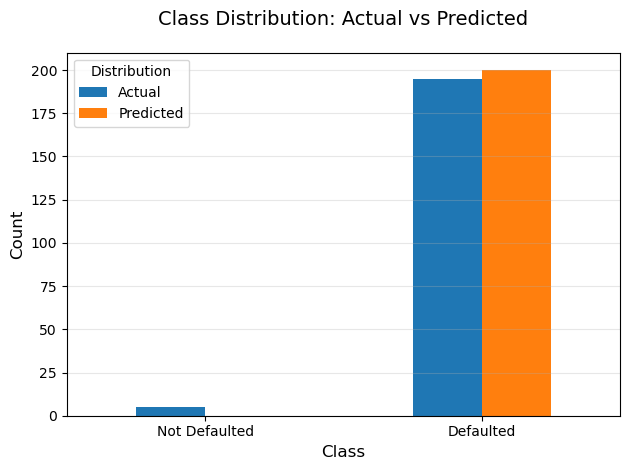

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import RocCurveDisplay


print("\n" + "="*50)
print("SUPPORT VECTOR MACHINE (SVM)")
print("="*50)

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_class_train)
y_pred = svm.predict(X_test_scaled)

# Evaluation with zero_division handled
print("Accuracy:", accuracy_score(y_class_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_class_test, y_pred,
                            zero_division=0,
                            target_names=['Not Defaulted', 'Defaulted']))

# Confusion matrix for better interpretation
print("\nConfusion Matrix:")
print(confusion_matrix(y_class_test, y_pred))

# Class distribution analysis
print("\nClass Distribution in Predictions:")
print(pd.Series(y_pred).value_counts())

print("\nClass Distribution in Test Data:")
print(y_class_test.value_counts())

plt.figure(figsize=(10, 6))
ConfusionMatrixDisplay.from_estimator(
    svm,
    X_test_scaled,
    y_class_test,
    display_labels=['Not Defaulted', 'Defaulted'],
    cmap='Blues',
    normalize='true',
    ax=plt.gca()
)
plt.title('SVM Confusion Matrix (Normalized)', fontsize=14, pad=20)
plt.grid(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
RocCurveDisplay.from_estimator(
    svm,
    X_test_scaled,
    y_class_test,
    name='SVM (RBF Kernel)',
    color='darkorange',
    ax=plt.gca()
)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('SVM ROC Curve', fontsize=14, pad=20)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
pd.DataFrame({
    'Actual': y_class_test.value_counts(),
    'Predicted': pd.Series(y_pred).value_counts()
}).plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Class Distribution: Actual vs Predicted', fontsize=14, pad=20)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Not Defaulted', 'Defaulted'], rotation=0)
plt.legend(title='Distribution')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Neural Network


NEURAL NETWORK (MLP)
Accuracy: 0.98
Loss curve: [0.09907671033269817, 0.09901854799753043, 0.09893722914443791, 0.09890316875356342, 0.09883581651584733]


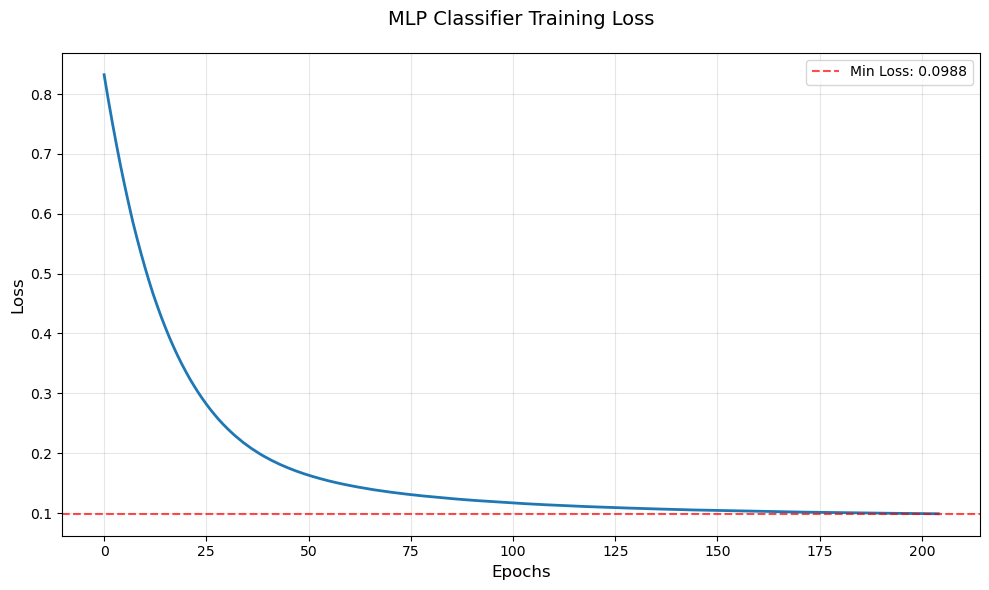

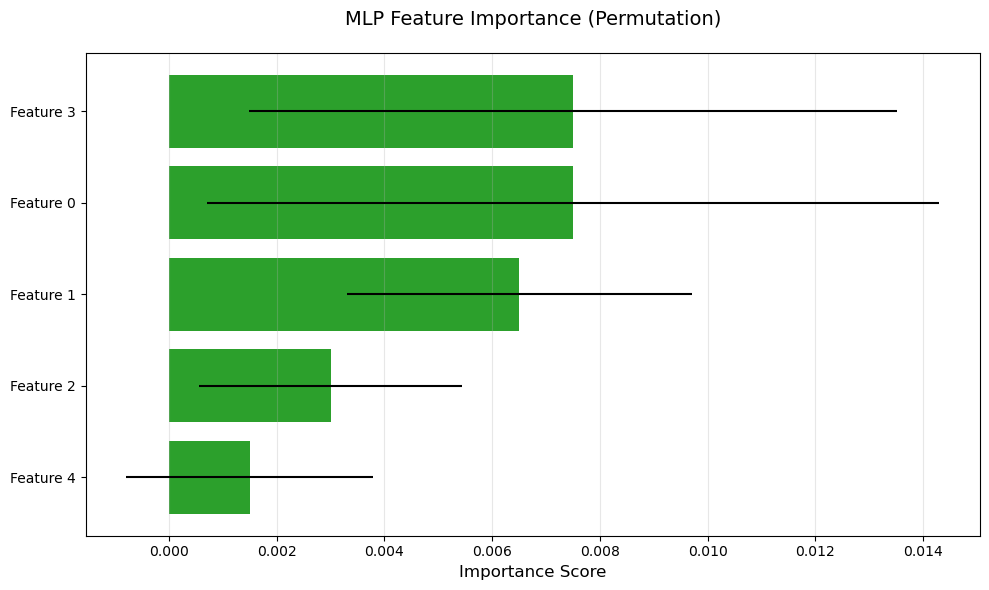

In [62]:
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance


print("\n" + "="*50)
print("NEURAL NETWORK (MLP)")
print("="*50)

nn = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
nn.fit(X_train_scaled, y_class_train)
y_pred = nn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_class_test, y_pred))
print("Loss curve:", nn.loss_curve_[-5:])  # Show last 5 loss values

plt.figure(figsize=(10, 6))
plt.plot(nn.loss_curve_, linewidth=2, color='#1f77b4')
plt.title('MLP Classifier Training Loss', fontsize=14, pad=20)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=min(nn.loss_curve_), color='r', linestyle='--', alpha=0.7,
            label=f'Min Loss: {min(nn.loss_curve_):.4f}')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
result = permutation_importance(nn, X_test_scaled, y_class_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.barh(range(X_test_scaled.shape[1]),
        result.importances_mean[sorted_idx],
        color='#2ca02c',
        xerr=result.importances_std[sorted_idx])
plt.yticks(range(X_test_scaled.shape[1]), [f'Feature {i}' for i in sorted_idx])
plt.title('MLP Feature Importance (Permutation)', fontsize=14, pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 10. Comparing All Classifiers

ALL CLASSIFIERS COMPARISON


,Model,Type,Accuracy,Precision,Recall,F1,ROC AUC
0,Logistic Regression,Classifier,0.980,0.980402,0.980,0.973435,0.916923
5,Neural Network,Classifier,0.980,0.980402,0.980,0.973435,0.924103
3,Naive Bayes,Classifier,0.975,0.950625,0.975,0.962658,0.833846
4,SVM,Classifier,0.975,0.950625,0.975,0.962658,0.670769
2,Random Forest,Classifier,0.970,0.950503,0.970,0.960152,0.879487
1,Decision Tree,Classifier,0.965,0.961352,0.965,0.963100,0.809744


<Figure size 1400x600 with 0 Axes>

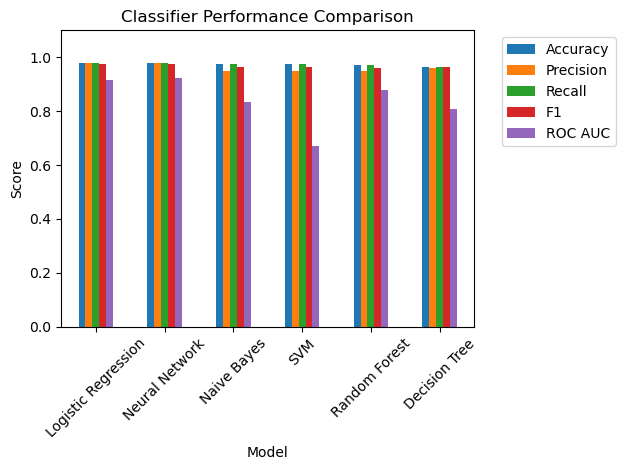

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_auc_score, mean_squared_error, mean_absolute_error,
                            r2_score)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

print("="*50)
print("ALL CLASSIFIERS COMPARISON")
print("="*50)

clf_results = []
for name, clf in classifiers.items():
    # Fit and predict
    if name in ["Logistic Regression", "SVM", "Neural Network"]:
        clf.fit(X_train_scaled, y_class_train)
        y_pred = clf.predict(X_test_scaled)
        y_proba = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None
    else:
        clf.fit(X_train, y_class_train)
        y_pred = clf.predict(X_test)
        y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_class_test, y_pred)
    precision = precision_score(y_class_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_class_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_class_test, y_pred, average='weighted', zero_division=0)
    roc_auc = roc_auc_score(y_class_test, y_proba) if y_proba is not None else None

    clf_results.append({
        'Model': name,
        'Type': 'Classifier',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC AUC': roc_auc,
    })

# Display classifier results
classifiers_df = pd.DataFrame(clf_results).sort_values('Accuracy', ascending=False)
display(classifiers_df)

# Plot comparison for classifiers
if not classifiers_df.empty:
    plt.figure(figsize=(14, 6))
    classifiers_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']].plot(
        kind='bar', rot=45
    )
    plt.title('Classifier Performance Comparison')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# 11. Comparing All Regressors


ALL REGRESSORS COMPARISON


,Model,Type,Accuracy,R²,MSE,RMSE,MAE
0,Linear Regression,Regressor,0.920,0.932850,3.785232e+06,1945.567309,1596.035716
2,Random Forest,Regressor,0.875,0.910749,5.031070e+06,2243.004669,1819.227350
1,Decision Tree,Regressor,0.880,0.885896,6.432035e+06,2536.145649,2097.433679


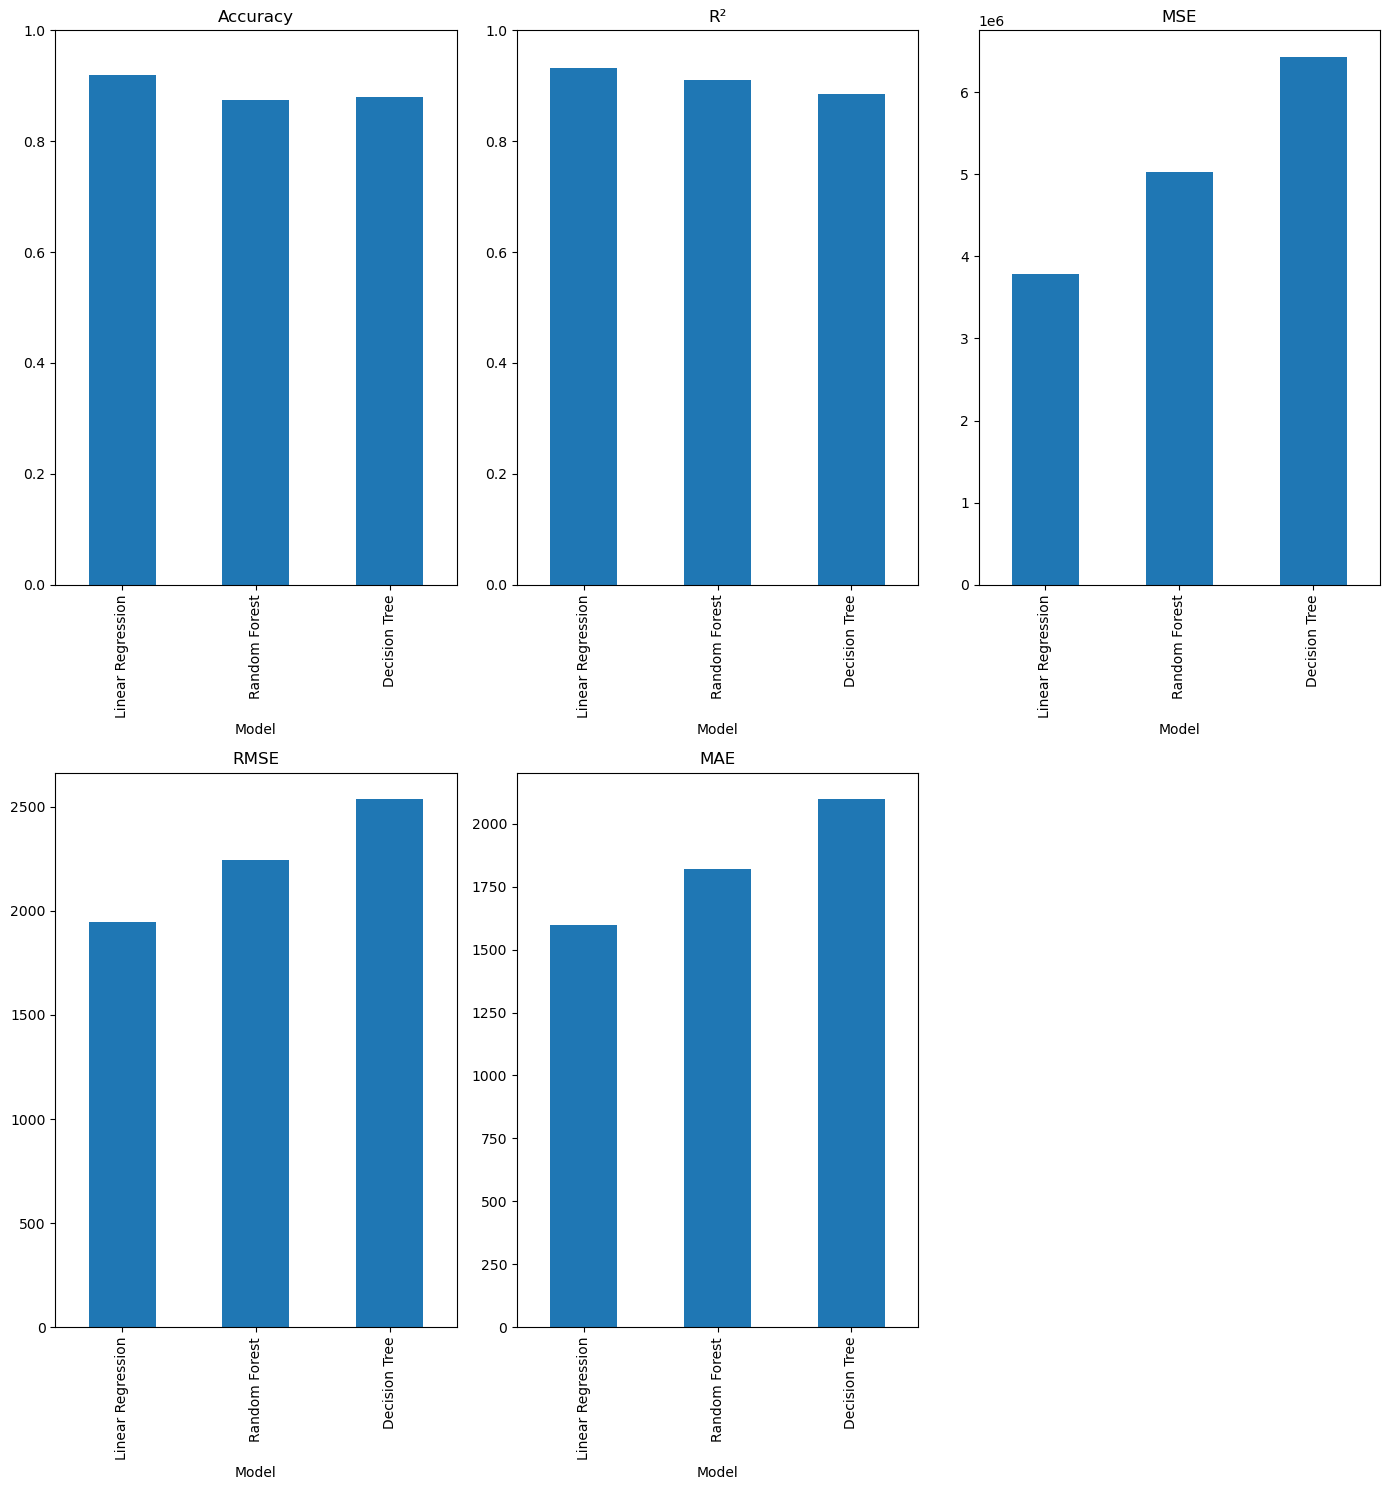

In [56]:
# Regressors
regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=3, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

print("\n" + "="*50)
print("ALL REGRESSORS COMPARISON")
print("="*50)

reg_results = []
for name, reg in regressors.items():
    # Fit and predict
    if name == "Linear Regression":
        reg.fit(X_train_scaled, y_reg_train)
        y_pred = reg.predict(X_test_scaled)
    else:
        reg.fit(X_train, y_reg_train)
        y_pred = reg.predict(X_test)

    # Calculate accuracy (binary classification of above/below median)
    median = np.median(y_reg_train)
    y_pred_class = (y_pred > median).astype(int)
    y_test_class = (y_reg_test > median).astype(int)

    # Calculate regression metrics
    metrics = {
        'Model': name,
        'Type': 'Regressor',
        'Accuracy': accuracy_score(y_test_class, y_pred_class),
        'R²': r2_score(y_reg_test, y_pred),
        'MSE': mean_squared_error(y_reg_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_reg_test, y_pred)),
        'MAE': mean_absolute_error(y_reg_test, y_pred)
    }

    reg_results.append(metrics)

# Create and display dataframe
regressors_df = pd.DataFrame(reg_results).sort_values('R²', ascending=False)
display(regressors_df)

# Plot metrics
if not regressors_df.empty:
    metrics = ['Accuracy', 'R²', 'MSE', 'RMSE', 'MAE']
    n_metrics = len(metrics)

    # Calculate grid dimensions (3x2 for 5 metrics leaves 1 empty, so we'll use 2x3 instead)
    n_rows = 2
    n_cols = 3

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 15))

    # Flatten axes array for easy iteration
    axes = axes.flat

    # Plot each metric
    for i, metric in enumerate(metrics):
        regressors_df.set_index('Model')[metric].plot(kind='bar', ax=axes[i])
        axes[i].set_title(metric)
        if metric in ['R²', 'Accuracy']:
            axes[i].set_ylim(0, 1)

    # Hide any remaining empty subplots
    for j in range(i+1, n_rows*n_cols):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# 12. model comparison


COMPREHENSIVE MODEL COMPARISON - ACCURACY FOR ALL MODELS


,Model,Accuracy,Type
0,Logistic Regression,0.980,Classifier
1,Neural Network,0.980,Classifier
2,Naive Bayes,0.975,Classifier
3,SVM,0.975,Classifier
4,Random Forest,0.970,Classifier
5,Decision Tree,0.965,Classifier
6,Linear Regression,0.920,Regressor
8,Decision Tree,0.880,Regressor
7,Random Forest,0.875,Regressor


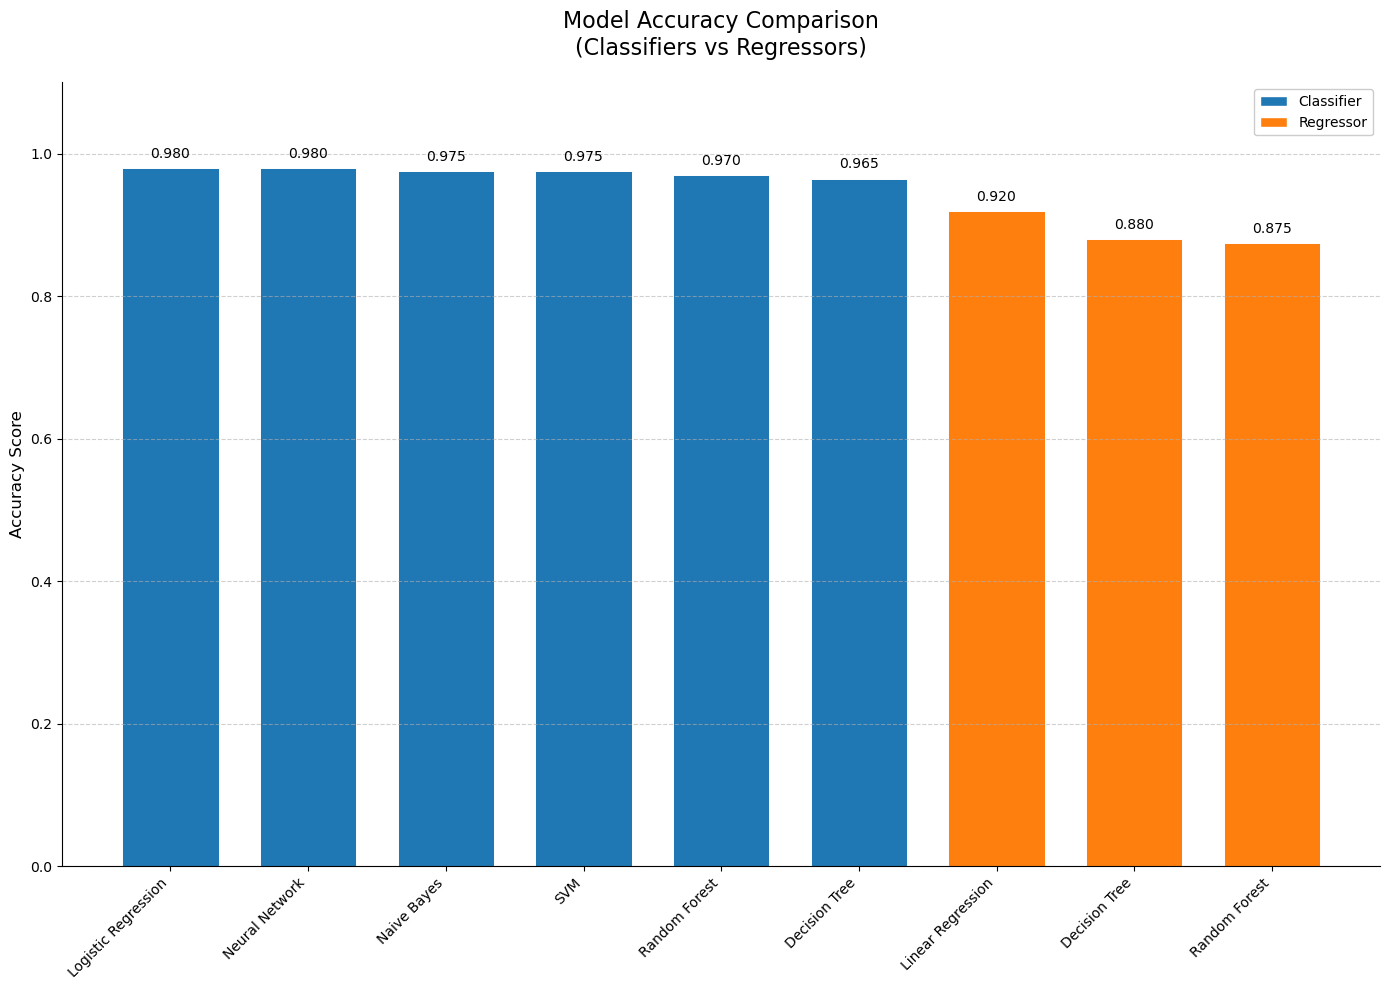

In [60]:
print("\n" + "="*50)
print("COMPREHENSIVE MODEL COMPARISON - ACCURACY FOR ALL MODELS")
print("="*50)

# Combine all models and reset index
final_comparison = pd.concat([
    classifiers_df[['Model', 'Accuracy', 'Type']],
    regressors_df[['Model', 'Accuracy', 'Type']]
]).reset_index(drop=True)  # This fixes the index issue

# Sort by Accuracy
final_comparison = final_comparison.sort_values('Accuracy', ascending=False)

# Create styled display with better formatting
styled_display = final_comparison.style \
    .background_gradient(subset=['Accuracy'], cmap='YlGnBu') \
    .format({'Accuracy': '{:.3f}'}) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#40466e'),
                    ('color', 'white'),
                    ('font-weight', 'bold')]
    }])

display(styled_display)

# Create enhanced plot
plt.figure(figsize=(14, 10))
ax = plt.subplot()

# Create bars with better visual separation
bar_width = 0.7
positions = np.arange(len(final_comparison))
bars = ax.bar(positions,
                final_comparison['Accuracy'],
                width=bar_width,
                color=['#1f77b4' if t == 'Classifier' else '#ff7f0e'
                    for t in final_comparison['Type']],
                edgecolor='white',
                linewidth=0.7)

# Enhanced labels and title
ax.set_title('Model Accuracy Comparison\n(Classifiers vs Regressors)',
                fontsize=16, pad=20)
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_ylim(0, 1.1)

# Better x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(final_comparison['Model'], rotation=45, ha='right', fontsize=10)

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Enhanced legend
classifier_patch = plt.Rectangle((0,0),1,1,fc='#1f77b4', edgecolor='white')
regressor_patch = plt.Rectangle((0,0),1,1,fc='#ff7f0e', edgecolor='white')
ax.legend([classifier_patch, regressor_patch],
            ['Classifier', 'Regressor'],
            loc='upper right',
            framealpha=1)

# Add value labels with better formatting
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.,
            height + 0.01,
            f'{height:.3f}',
            ha='center',
            va='bottom',
            fontsize=10)

# Remove spines for cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


COMPREHENSIVE MODEL COMPARISON - ACCURACY FOR ALL MODELS


,Model,Accuracy,Type
0,Logistic Regression,0.980,Classifier
5,Neural Network,0.980,Classifier
3,Naive Bayes,0.975,Classifier
4,SVM,0.975,Classifier
2,Random Forest,0.970,Classifier
1,Decision Tree,0.965,Classifier
0,Linear Regression,0.920,Regressor
1,Decision Tree,0.880,Regressor
2,Random Forest,0.875,Regressor


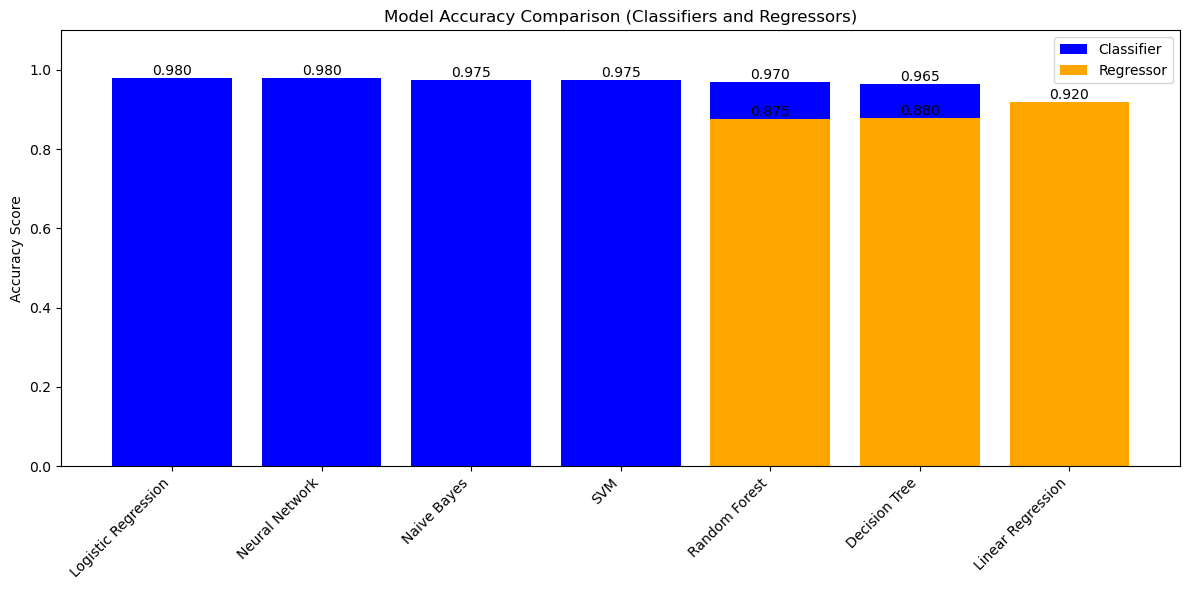

In [ ]:
print("\n" + "="*50)
print("COMPREHENSIVE MODEL COMPARISON - ACCURACY FOR ALL MODELS")
print("="*50)

# Combine all models
final_comparison = pd.concat([
    classifiers_df[['Model', 'Accuracy', 'Type']],
    regressors_df[['Model', 'Accuracy', 'Type']]
])

# Sort by Accuracy
final_comparison = final_comparison.sort_values('Accuracy', ascending=False)

display(final_comparison)

# Create single plot with all models
plt.figure(figsize=(12, 6))
bars = plt.bar(final_comparison['Model'], final_comparison['Accuracy'], color=['blue' if t == 'Classifier' else 'orange' for t in final_comparison['Type']])

# Add labels and title
plt.title('Model Accuracy Comparison (Classifiers and Regressors)')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)

# Add legend
classifier_patch = plt.Rectangle((0,0),1,1,fc='blue')
regressor_patch = plt.Rectangle((0,0),1,1,fc='orange')
plt.legend([classifier_patch, regressor_patch], ['Classifier', 'Regressor'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()